In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Importing Libraries

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sb
from statsmodels.graphics.tsaplots import plot_acf
import pandas as pd
import plotly.express as px

In [4]:
%matplotlib inline

# Load Datasets

In [5]:
df = pd.read_csv("reliance_data.csv", parse_dates=["Date"])
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,01-01-1996,RELIANCE,EQ,204.65,205.00,206.10,203.65,NaN,205.75,205.26,3717450,7.630000e+13,NaN,NaN,NaN
1,02-01-1996,RELIANCE,EQ,205.75,205.25,206.25,202.65,NaN,204.15,204.13,6024650,1.230000e+14,NaN,NaN,NaN
2,03-01-1996,RELIANCE,EQ,204.15,207.50,216.95,205.25,NaN,205.70,207.04,7473500,1.550000e+14,NaN,NaN,NaN
3,04-01-1996,RELIANCE,EQ,205.70,203.75,204.40,201.05,NaN,203.80,202.47,7744000,1.570000e+14,NaN,NaN,NaN
4,05-01-1996,RELIANCE,EQ,203.80,203.00,203.00,200.65,NaN,202.40,202.05,5952000,1.200000e+14,NaN,NaN,NaN


# Preprocessing the data

In [6]:
# df.set_index("Date", drop=False, inplace=True)
df.index = pd.to_datetime(df['Date'], dayfirst = True)
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,,
1996-01-01,01-01-1996,RELIANCE,EQ,204.65,205.00,206.10,203.65,NaN,205.75,205.26,3717450,7.630000e+13,NaN,NaN,NaN
1996-01-02,02-01-1996,RELIANCE,EQ,205.75,205.25,206.25,202.65,NaN,204.15,204.13,6024650,1.230000e+14,NaN,NaN,NaN
1996-01-03,03-01-1996,RELIANCE,EQ,204.15,207.50,216.95,205.25,NaN,205.70,207.04,7473500,1.550000e+14,NaN,NaN,NaN
1996-01-04,04-01-1996,RELIANCE,EQ,205.70,203.75,204.40,201.05,NaN,203.80,202.47,7744000,1.570000e+14,NaN,NaN,NaN
1996-01-05,05-01-1996,RELIANCE,EQ,203.80,203.00,203.00,200.65,NaN,202.40,202.05,5952000,1.200000e+14,NaN,NaN,NaN


In [7]:
df.drop("Date", axis=1)

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
1996-01-01,RELIANCE,EQ,204.65,205.00,206.10,203.65,NaN,205.75,205.26,3717450,7.630000e+13,NaN,NaN,NaN
1996-01-02,RELIANCE,EQ,205.75,205.25,206.25,202.65,NaN,204.15,204.13,6024650,1.230000e+14,NaN,NaN,NaN
1996-01-03,RELIANCE,EQ,204.15,207.50,216.95,205.25,NaN,205.70,207.04,7473500,1.550000e+14,NaN,NaN,NaN
1996-01-04,RELIANCE,EQ,205.70,203.75,204.40,201.05,NaN,203.80,202.47,7744000,1.570000e+14,NaN,NaN,NaN
1996-01-05,RELIANCE,EQ,203.80,203.00,203.00,200.65,NaN,202.40,202.05,5952000,1.200000e+14,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-23,RELIANCE,EQ,1899.50,1951.00,1970.00,1926.25,1955.20,1950.70,1952.18,20918665,4.083700e+15,497781.0,5148955.0,0.2461
2020-11-24,RELIANCE,EQ,1950.70,1964.00,1974.00,1932.00,1971.05,1964.05,1952.11,14277083,2.787040e+15,362587.0,3213843.0,0.2251
2020-11-25,RELIANCE,EQ,1964.05,1980.00,1992.95,1942.20,1947.50,1947.80,1969.06,15062376,2.965870e+15,356793.0,3040444.0,0.2019


# Data vs Volume plot

In [8]:
sb.set_theme()
sb.set(rc={'figure.figsize':(15,8)})
fig = px.line(df, x='Date', y="Volume",render_mode="SVG")
fig.show(renderer='iframe')

# Date vs High Price of the day plot

In [19]:
fig = px.line(df, x = 'Date', y = 'High',render_mode="SVG")
fig.show(renderer='iframe')

# Simple Moving Average (SMA) for 10 and 200 days

In a moving average, we consider a subset of data and calculate its average. In stock market analysis, the moving average smooths out short-term price fluctuations, and filters out the noise (outlier data that could confuse the model). This results in a clearer picture of the price trend as compared to the raw data. here, SMA 10 shows present trend and SMA 200 shows long term trend.

In [10]:
df_sma=df.copy()
df_sma['SMA_10']=df_sma.VWAP.rolling(10, min_periods=1).mean()
df_sma['SMA_200']=df_sma.VWAP.rolling(200, min_periods=1).mean()

DONE VWAP
DONE SMA 10
DONE SMA 200


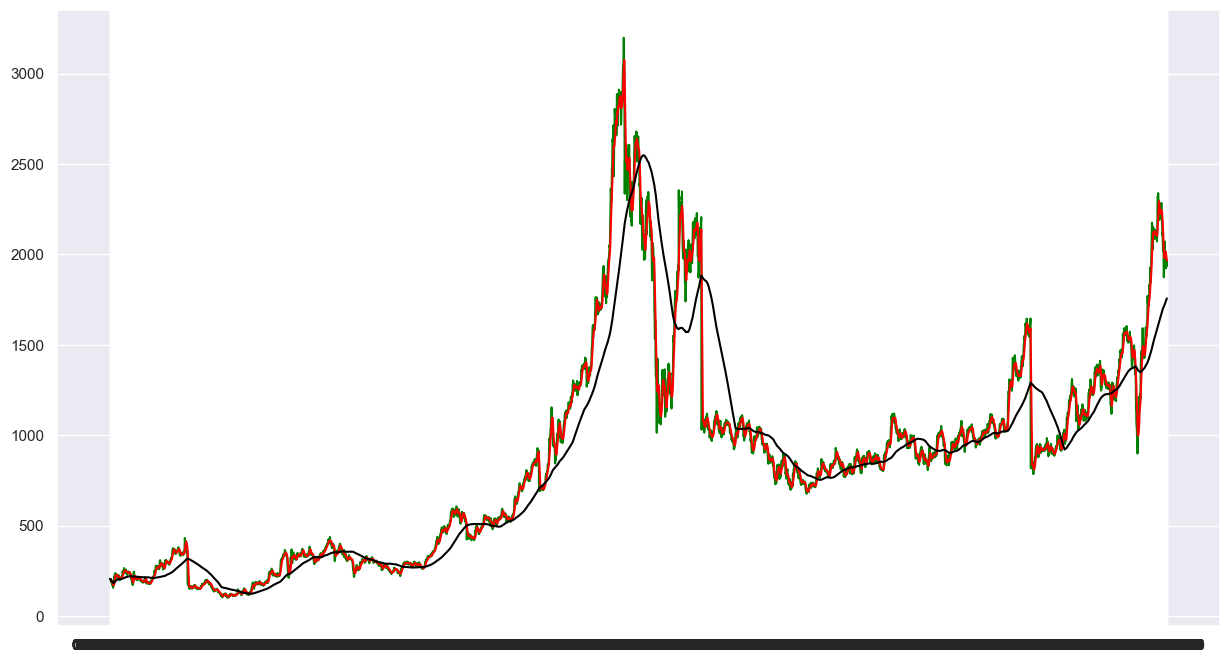

In [11]:
plt.plot(df_sma['Date'], df_sma['VWAP'], color='green')
print("DONE VWAP")
plt.plot(df_sma['Date'],df_sma['SMA_10'], color='red')
print("DONE SMA 10")
plt.plot(df_sma['Date'],df_sma['SMA_200'], color='black')
print("DONE SMA 200")
plt.show()

# Autocorrelation plot¶

The measure of autocorrelation represents the relationship between the current value of a variable with its past value. We can use it to check whether the elements in the time series data are positively correlated, negatively correlated, or independent of each other.

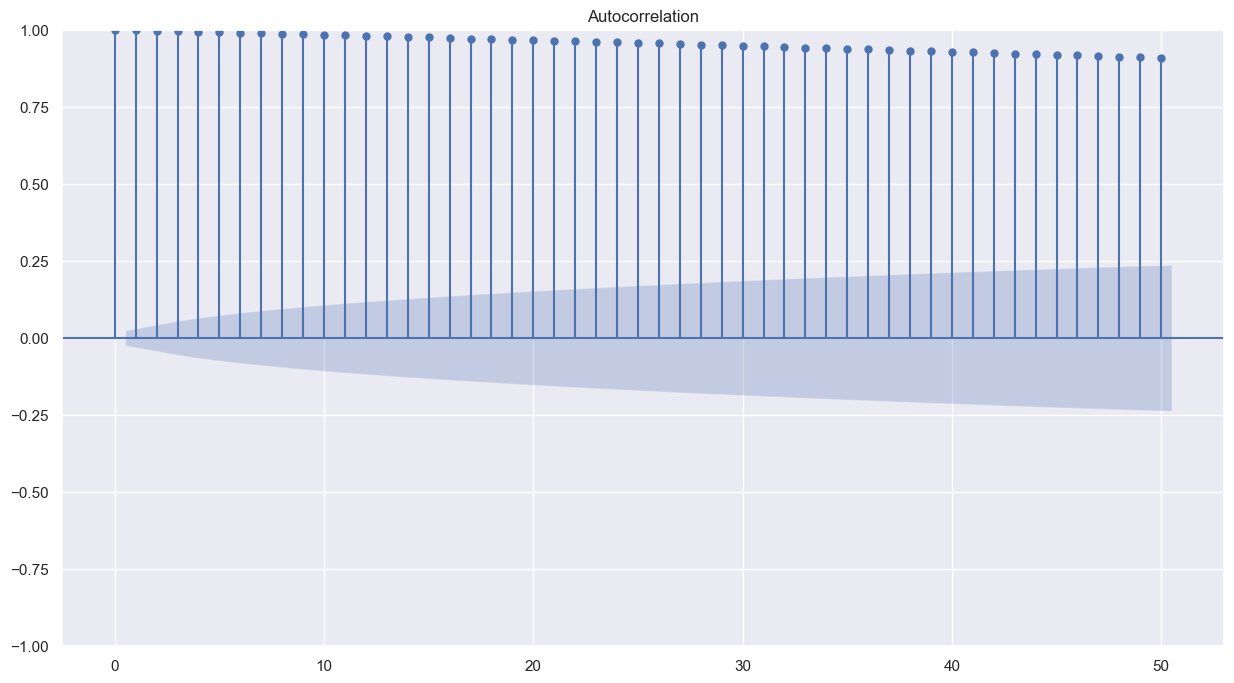

In [12]:
df.isnull().sum()
df['VWAP'].interpolate(method='linear',axis=0,inplace=True)
plot_acf(df['VWAP'], lags=50)
plt.show()

# Heatmap

In this plot, analyze the prices of the stock at different time frames.

In [13]:
df_temp=df.copy()
df_temp['day'] = df_temp.index.day
df_temp['month'] = df_temp.index.month
df_temp['year'] = df_temp.index.year

In [14]:
df_temp.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,day,month,year
Date,,,,,,,,,,,,,,,,,,
1996-01-01,01-01-1996,RELIANCE,EQ,204.65,205.00,206.10,203.65,NaN,205.75,205.26,3717450,7.630000e+13,NaN,NaN,NaN,1,1,1996
1996-01-02,02-01-1996,RELIANCE,EQ,205.75,205.25,206.25,202.65,NaN,204.15,204.13,6024650,1.230000e+14,NaN,NaN,NaN,2,1,1996
1996-01-03,03-01-1996,RELIANCE,EQ,204.15,207.50,216.95,205.25,NaN,205.70,207.04,7473500,1.550000e+14,NaN,NaN,NaN,3,1,1996
1996-01-04,04-01-1996,RELIANCE,EQ,205.70,203.75,204.40,201.05,NaN,203.80,202.47,7744000,1.570000e+14,NaN,NaN,NaN,4,1,1996
1996-01-05,05-01-1996,RELIANCE,EQ,203.80,203.00,203.00,200.65,NaN,202.40,202.05,5952000,1.200000e+14,NaN,NaN,NaN,5,1,1996


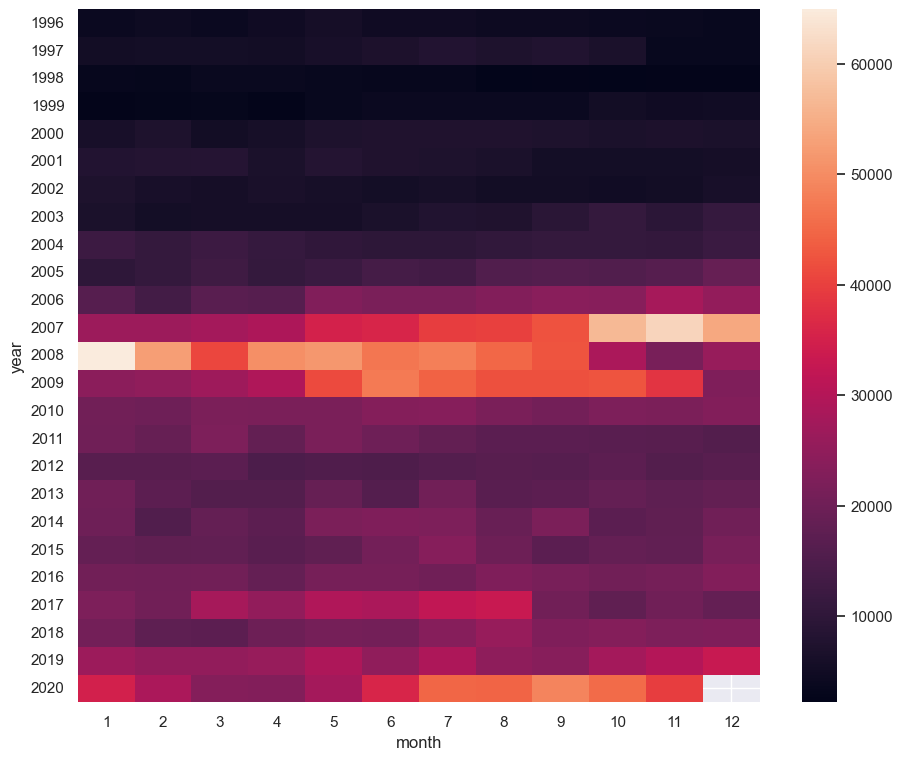

In [15]:
df_m=df_temp.groupby(['month', 'year']).sum()
df_m

df_m=df_m.unstack(level=0)
fig, ax = plt.subplots(figsize=(11, 9))
sb.heatmap(df_m['VWAP'])
plt.show()